In [1]:
# Ignore Warnings
import warnings
warnings.simplefilter('ignore')

In [2]:
# Import Standard Libraries
import pickle
import pandas as pd
import numpy as np

# Import Markdown Libraries
from IPython.display import Markdown as md
from IPython.display import display as disp

# Import Visualization Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import shap

# Import ML Libraries
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Pandas Configs
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None
pd.options.display.width = None
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# MapBox Token for Plotly Maps
px.set_mapbox_access_token(os.environ.get("MAPBOX_TOKEN"))

In [4]:
# Import Model Results Parquet Data
model_results_df = pd.read_parquet('/work/data/apps/model_results_df.parquet')

In [5]:
# Import Parquet Data for Map Visualization
df = pd.read_parquet('/work/data/apps/vis_df.parquet')
carb_prov = pd.read_parquet('/work/data/apps/carb_prov.parquet')
seaa_prov = pd.read_parquet('/work/data/apps/seaa_prov.parquet')

# Import Pickled Data for Map Visualization
with open("/work/data/apps/carb_prov_geo.pickle", "rb") as f:
    carb_prov_geo = pickle.load(f)
with open("/work/data/apps/seaa_prov_geo.pickle", "rb") as f:
    seaa_prov_geo = pickle.load(f)

# Import Parquet Data for Clustering Map Visualization
gcb = pd.read_parquet("/work/data/Global_Coral_Bleaching_DB/gcb_v4.parquet")

In [6]:
#Import X & y data for SHAP waterfall plots
CARB_Xtt = pd.read_parquet('/work/data/apps/CARB_Xtt.parquet')
SEAA_Xtt = pd.read_parquet('/work/data/apps/SEAA_Xtt.parquet')
GLOB_Xtt = pd.read_parquet('/work/data/apps/GLOB_Xtt.parquet')
CARB_Xvt = pd.read_parquet('/work/data/apps/CARB_Xvt.parquet')
SEAA_Xvt = pd.read_parquet('/work/data/apps/SEAA_Xvt.parquet')
GLOB_Xvt = pd.read_parquet('/work/data/apps/GLOB_Xvt.parquet')
CARB_Xht = pd.read_parquet('/work/data/apps/CARB_Xht.parquet')
SEAA_Xht = pd.read_parquet('/work/data/apps/SEAA_Xht.parquet')
GLOB_Xht = pd.read_parquet('/work/data/apps/GLOB_Xht.parquet')

CARB_yt = pd.read_parquet('/work/data/apps/CARB_yt.parquet')
SEAA_yt = pd.read_parquet('/work/data/apps/SEAA_yt.parquet')
GLOB_yt = pd.read_parquet('/work/data/apps/GLOB_yt.parquet')
CARB_yv = pd.read_parquet('/work/data/apps/CARB_yv.parquet')
SEAA_yv = pd.read_parquet('/work/data/apps/SEAA_yv.parquet')
GLOB_yv = pd.read_parquet('/work/data/apps/GLOB_yv.parquet')
CARB_yh = pd.read_parquet('/work/data/apps/CARB_yh.parquet')
SEAA_yh = pd.read_parquet('/work/data/apps/SEAA_yh.parquet')
GLOB_yh = pd.read_parquet('/work/data/apps/GLOB_yh.parquet')

In [7]:
# with open('/work/data/apps/shap/GLOB_val_shap_interaction.pickle', 'rb') as f:
#     GLOB_v_shap_interaction = pickle.load(f)
# with open('/work/data/apps/shap/GLOB_holdout_shap_interaction.pickle', 'rb') as f:
#     GLOB_h_shap_interaction = pickle.load(f)

In [8]:
# Import the SHAP objects for SHAP waterfall plots
with open("/work/data/apps/shap/CARB_val_shap_values.pickle", "rb") as f:
    CARB_v_shap_values = pickle.load(f)
with open("/work/data/apps/shap/SEAA_val_shap_values.pickle", "rb") as f:
    SEAA_v_shap_values = pickle.load(f)
with open("/work/data/apps/shap/GLOB_val_shap_values.pickle", "rb") as f:
    GLOB_v_shap_values = pickle.load(f)

with open("/work/data/apps/shap/CARB_holdout_shap_values.pickle", "rb") as f:
    CARB_h_shap_values = pickle.load(f)
with open("/work/data/apps/shap/SEAA_holdout_shap_values.pickle", "rb") as f:
    SEAA_h_shap_values = pickle.load(f)
with open("/work/data/apps/shap/GLOB_holdout_shap_values.pickle", "rb") as f:
    GLOB_h_shap_values = pickle.load(f)

In [9]:
# Lists of good and poor predictions for SHAP waterfall plots
with open('/work/data/apps/shap/lists/CARB_Hld_good.pickle', 'rb') as f:
    CARB_h_good = pickle.load(f)
with open('/work/data/apps/shap/lists/CARB_Val_good.pickle', 'rb') as f:
    CARB_v_good = pickle.load(f)
with open('/work/data/apps/shap/lists/SEAA_Hld_good.pickle', 'rb') as f:
    SEAA_h_good = pickle.load(f)
with open('/work/data/apps/shap/lists/SEAA_Val_good.pickle', 'rb') as f:
    SEAA_v_good = pickle.load(f)
with open('/work/data/apps/shap/lists/GLOB_Hld_good.pickle', 'rb') as f:
    GLOB_h_good = pickle.load(f)
with open('/work/data/apps/shap/lists/GLOB_Val_good.pickle', 'rb') as f:
    GLOB_v_good = pickle.load(f)

with open('/work/data/apps/shap/lists/CARB_Hld_bad.pickle', 'rb') as f:
    CARB_h_bad = pickle.load(f)
with open('/work/data/apps/shap/lists/CARB_Val_bad.pickle', 'rb') as f:
    CARB_v_bad = pickle.load(f)
with open('/work/data/apps/shap/lists/SEAA_Hld_bad.pickle', 'rb') as f:
    SEAA_h_bad = pickle.load(f)
with open('/work/data/apps/shap/lists/SEAA_Val_bad.pickle', 'rb') as f:
    SEAA_v_bad = pickle.load(f)
with open('/work/data/apps/shap/lists/GLOB_Hld_bad.pickle', 'rb') as f:
    GLOB_h_bad = pickle.load(f)
with open('/work/data/apps/shap/lists/GLOB_Val_bad.pickle', 'rb') as f:
    GLOB_v_bad = pickle.load(f)

In [10]:
# Fetch model objects
with open("/work/models/xgboost_reg/CARB/20240413_185012_model.pkl", "rb") as f:
    CARB_XGB_model = pickle.load(f)
with open("/work/models/xgboost_reg/SEAA/20240413_191526_model.pkl", "rb") as f:
    SEAA_XGB_model = pickle.load(f)
with open("/work/models/xgboost_reg/GLOB/20240413_195305_model.pkl", "rb") as f:
    GLOB_XGB_model = pickle.load(f)
    
# Fetch model objects
with open("/work/models/lightgbm_reg/CARB/20240413_195656_model.pkl", "rb") as f:
    CARB_LGBM_model = pickle.load(f)
with open("/work/models/lightgbm_reg/SEAA/20240413_210139_model.pkl", "rb") as f:
    SEAA_LGBM_model = pickle.load(f)
with open("/work/models/lightgbm_reg/GLOB/20240414_113645_model.pkl", "rb") as f:
    GLOB_LGBM_model = pickle.load(f)

In [11]:
# Load data for Features Selection table
feature_selection_df = pd.read_parquet('/work/data/apps/TopFeatures.parquet')

<img src="data/apps/images/ProjectCoralBleaching.png" width="50%" align="left" />

# When Corals Lose Their Hue: A Study of Coral Bleaching

## Introduction

"The Great Barrier Reef is in grave danger. The twin perils brought by climate change – an increase in the temperature of the ocean and in its acidity – threaten its very existence.”  - Sir David Attenborough

As Sir Attenborough has stated, the Great Barrier Reef, along with countless other reefs across the globe, are in danger caused by human activities that impact these delicate ecosystems, which support an estimated 25% of all known marine species.

Coral bleaching is a condition in which corals that are stressed by some external factor, such as fluctuating temperatures and changes in water chemistry, eject their symbiotic algae.  These algae are critical to the health of the corals, providing a critical food source, in addition to their vibrant colors.  Bleached coral can survive, but they are subject to higher rates of mortality.  

In a paper by Indeever Madireddy, et al. titled “Using machine learning to develop a global coral bleaching predictor” [1] Madireddy and team used oceanic data from an earlier, simpler version of the Global Coral-Bleaching Database (GCBD) [2] to forecast which reefs should be allocated resources in order to preserve them.  Our analysis uses the most recent version of the same data source as Madireddy, which has incorporated an additional 20 years of data, and it will be supplemented with fishing and fertilizer features from the World Bank’s World Development Indicators (WDI) [3], to test the hypothesis that these features will help provide predictive power.  Additionally, we used the Marine Ecoregions of the World (MEOW) [4] dataset to identify regional candidates for models.

Our goal is simple: Can we predict global and local bleaching patterns, and provide information to help local institutions, governments, and organizations mitigate coral bleaching?  We will test fertilizer and fishing activity features to determine if they can be used to predict the health of coral reefs, along with various weather and geographic features.  These results could help influence policy and decision making for local authorities.

An additional component of our analysis is to identify similar reef sites across the globe to give local communities a cluster of comparable reefs to observe long term patterns in coral bleaching and the activities which impact that pattern.

## Methodology

In this section we cover the entire process that allowed us to generate our models and ultimately answer our primary question. We cover the dataset creation, cleaning and splitting which segues into the feature selection and importance determination. From there we touch on the various machine learning techniques that were explored in this project.

### Datasets & Preparation

Our primary dataset for this project was Global Coral-Bleaching Database (GCBD), which contains measurements from reef sites across the world taken by 7 different research organizations/projects between 1980-2020. We supplemented this with data from the World Bank’s World Development Indicators (WDI) to include features on fishing and agriculture, as well as data from the Marine Ecoregions of the World (MEOW) to include features on the ecological region of the reef sites.  GCBD and WDI are covered by the Creative Commons Attribution 4.0 license, while MEOW is public for non-commercial use with attribution.  A data dictionary of evaluated features can be found in Appendix E.

In efforts to clean our data we restricted our analysis to 1998-2020, as there appeared to be an issue of selection bias in measurements pre-1998 where the majority of reef sites surveyed showed high levels of bleaching. We also limited our investigation to hard corals, as not all soft corals exhibit the same symbiotic relationship with algae [5].

In addition to analyzing Coral Bleaching on a global scale we also wanted to take a closer look at the Caribbean and Southeast Asia and Australia (denoted as CARB and SEAA, respectively, in this report). Focusing on these regions allowed us to improve model performance by allowing the model to better learn the nuance of the regions, for example the Pacific ocean is generally colder than the Atlantic ocean.

From here we chose to split our dataset into training, validation, and holdout datasets using an 70/15/15 split to combat any data leakage issues. We verified that features like depth, location, and sampling timing by month were all equally distributed such that any one of these splits would not contain disproportionate amounts of information (Fig. 1)


<img src="data/apps/images/Data_split_lat_long.png" width="" align="" />

### Feature Reduction & Selection

We explored various methods to select and reduce our feature set to improve our models performance including Principal Component Analysis, Variance Inflation Factor Analysis, Shapley Additive Explanations to understand interaction variables, and a robust feature selection process.


#### Principal Component Analysis

Since our cleaned dataset contained more than 90 features, we decided to perform a PCA analysis, thinking it might be useful in reducing the dimensionality of the dataset by providing latent features. 

<img src="data/apps/images/PCA_Scree.png" width="" align="" />

The “elbow” of the Scree plots (Fig. 2) all lined up with the first 3 principal components and account for approximately 50% of the total explained variance. We determined that in order to retain a majority of the explained variance, we needed to retain almost all of the original features, indicating each feature was already linearly independent. Based on this we looked to other methods to help reduce the feature space.

#### Variance Inflation Factor (VIF)

One aspect of our data that could lead to difficulties in interpretability is potential multicollinearity of the features.  With highly multicollinear data, it is difficult to attribute the contributions of specific features.  Initial testing with Variance Inflation Factor (VIF) indicated a massive degree of multicollinearity within the 57 continuous features that comprised the dataset, especially around the WDI data.  After reducing the dataset to basic weather, fishing, and fertilizer related features, the VIF scores for the remaining 17 features were 5 or lower, indicating an acceptable degree of multicollinearity, with a loss of only 0.3 MAE when compared to the full dataset using an unoptimized XGBoost model.

#### Shapley Additive Explanations (SHAP)

We next used Shapley Additive Explanations against all 3 regions and 17 features to investigate complex interactions within the data.  When performing summary plots against each region, the fishing and fertilizer features were consistently in the top  interactions for all regions.  

We created interaction variables for fishing (Number of Threatened Fish Species * Fish Captured Metric Tons), and for fertilizer (Fertilizer kg per hectare / Km2 Agricultural Land).  The original features were then removed from the data in order to prevent additional multicollinearity issues, which was consistent with WDI features (Fig. 3).

<img src="data/apps/images/shap_glob_interactions.png" width="" align="" />

<img src="data/apps/images/shap_seaa_dependency_tsa_ssta.png" width="" align="" />

Additional investigation into the interactions for SSTA and TSA (Sea Surface Temperature Anomaly and Thermal Stress Anomaly, respectively) indicated a potentially complex relationship (Fig. 4), prompting the creation of polynomial features, of which the TSA_cubed_SSTA_squared feature was most significant.  

Considering our interest in determining if water turbidity was a contributing factor in coral bleaching, we also used domain experience to create two additional features that utilized Turbidity, measured using [Kd490nm attenuation](https://eastcoast.coastwatch.noaa.gov/cw_k490.php).  The first used the previously created fertilizer interaction feature and multiplied that by turbidity, and the second multiplied distance to shore against turbidity.

The features of interest that survived were:
Depth_m, Distance_to_Shore, Turbidity,  Longitude_Degrees, Latitude_Degrees, ClimSST, Cyclone_Frequency, SSTA_Frequency, TSA_Frequency, Fertilizer_Inter, Fishing_Inter, Dist_to_Shore_and_Turbidity_Interaction, Fert_and_Turbidity_Interaction, TSA_cubed_SSTA, TSA_cubed_SSTA_squared, SSTA, TSA, SSTA_DHW, and TSA_DHW

#### Final Feature Selection

Given our regional approach to the data, we wanted to determine the best combination of features and models.  Our criteria for selecting models included the need for regularization, the ability to handle missing data, parallelization, and the capability of handling non-linear relationships.  RandomForest, HistGradientBoosting, XGBoost, and LightGBM all passed these criteria and were included in our analysis.

With models determined, we began the feature selection process.  For combinations of 19 features, this meant roughly 524k models would be built for each model type and region combination.  Initial testing indicated RandomForestRegressor would not be well suited to this task, given a runtime of 3 minutes 45 seconds to build 3 models (compared to 1.6 seconds for LightGBM).  HistGradientBoostingRegressor was not selected for this task despite providing significantly better MAE scores than XGBoost and LightGBM, as it took 324% and 235% more time to train, respectively.

With XGBoost and LightGBM selected for customized features, we then built over 15.7 million models to test for optimal feature combinations by region, model type and using 5 cross validation folds, taking approximately 60 hours to complete.  These features were then ranked and the features providing the best MAE results were selected for use in the model creation process.

### Model Selection & Creation

In addition to the decision tree algorithms mentioned above, we also tested a dummy regressor and an ElasticNet regressor to ensure our predictions were at least as good as guessing (DummyRegressor) and to see how well a highly biased model would perform (ElasticNet).  Hyperparameter tuning for each model type was performed using Hyperopt's  Bayesian optimization with a 5-fold cross validation. Models were then tested against the validation data set and hyperparameters were tracked using Neptune.ai.  By using the validation data set, we were able to ensure that no data leakage occurred in choosing our final hyperparameters, as these hyperparameters were disassociated from the holdout data set, which we evaluated after feature and model selection was finalized.

Our primary evaluation metric was Mean Absolute Error (MAE), since we were predicting a continuous value (Percent Bleached) between 0 and 100.  This made the MAE metric easily understandable and explainable.  We also calculated Root Mean Squared Error (RMSE) and R-squared (R2) so we could compare our model performance to the Madireddy, et al. paper.

Prior to scoring against the holdout data, we chose to perform another iteration of tuning whereby we ablated the feature set for each model/region to see if the model performance improved. By running feature ablation we were confident that not only were our hyperparameters optimized, but our feature space was also optimized.  In a few cases, due to the hyperparameter tuning, it was found that some features could be dropped to very slightly improve model performance, but the maximum value difference observed was 0.1 MAE out of 100, so we elected not to drop any features as a result of ablation.

For our unsupervised clustering model, we used a combination of Silhouette scores and an elbow plot to determine the number of clusters that would be best.  We then used a K-mean clustering algorithm to cluster the reef sites worldwide and by region. Our Silhouette scores determined the number of clusters to choose was above 0.8 (Appx. C), indicating good clustering.

## Results

For this project, a successful outcome would be a model that is well suited to predict coral bleaching (one that minimizes error) while also being highly explainable. Supplementary to our regression model, we wanted to use clustering methods to determine similar reef sites that can be used with our model to inform stakeholder decision making. Below is a table (Tbl. 1) that shows the model type ('model') and the region (ex: GLOB, SEAA, CARB) in which that model was used.  The three columns to the right show the evaluation metrics: mae, rmse, and rsq.

### Coral Bleaching Model Accuracy

In [12]:
print("Table 1: All Hyperparameter Tuned Model Results for the Holdout Data Set")
model_results_df[model_results_df["split"] == 'Holdout'][
    ["model", "region", "mae", "rmse", "rsq"]
].round(4).sort_values(['region','mae']).reset_index(drop=True)#.head(25).style.hide(axis="index")

Table 1: All Hyperparameter Tuned Model Results for the Holdout Data Set


model region   mae  rmse  rsq
0    LGBM   CARB  9.11 16.65 0.55
1    HGBM   CARB  9.26 15.93 0.58
2     XGB   CARB  9.30 16.36 0.56
3      RF   CARB 11.41 17.26 0.51
4    ENET   CARB 17.10 22.94 0.14
5   Dummy   CARB 19.19 24.70 0.00
6    LGBM   GLOB  8.58 16.69 0.43
7     XGB   GLOB  8.72 15.71 0.49
8    HGBM   GLOB  9.09 15.49 0.51
9      RF   GLOB 10.45 16.38 0.45
10   ENET   GLOB 14.72 20.95 0.10
11  Dummy   GLOB 16.25 22.05 0.00
12    XGB   SEAA  7.28 14.76 0.27
13   LGBM   SEAA  7.40 14.19 0.33
14   HGBM   SEAA  7.48 13.86 0.36
15     RF   SEAA  7.98 13.76 0.37
16   ENET   SEAA 10.69 16.80 0.06
17  Dummy   SEAA 11.23 17.30 0.00

Referencing Tbl. 1, we can see that for the Holdout data set the best MAE values for each region were provided by XGBoost and LightGBM, and were in the range of 7-9 MAE , meaning that our models were able to make predictions with an average accuracy of 91-93%.  The features that were used to train the XGBoost and LightGBM models for each region, along with their importance, can be observed in the interactive feature importance graphs below (Fig. 5 and 6).  These results indicate we are successful at creating models that are capable of reliably predicting coral bleaching using the decision tree models.  ElasticNet, even hypertuned, was not able to achieve a reasonable MAE score due to the aforementioned lack of linearity in the data.

Ultimately, comparing these results to the Madireddy et al. paper was not realistic.  The Madireddy paper utilized an earlier version of the Global Coral Bleaching Database, which contained fewer sources of data, and fewer differences in data collection and measurement methods, which we believe created a situation of selection bias, resulting in an exceptionally high performing model (7.91 RMSE).  The five weather features that were used in the Madireddy paper were tested as part of the final feature selection process with our more complete dataset, and they did not provide the best results.

In [13]:
LG_df = pd.DataFrame(
    {'Feature': GLOB_LGBM_model.booster_.feature_name(), 'Raw_Importance': GLOB_LGBM_model.booster_.feature_importance()}).sort_values(
    by='Raw_Importance', ascending=True)
LG_df['Importance'] = LG_df['Raw_Importance'] / LG_df['Raw_Importance'].sum()
LG_df = LG_df.sort_values(by='Importance', ascending=True)

LC_df = pd.DataFrame(
    {'Feature': CARB_LGBM_model.booster_.feature_name(), 'Raw_Importance': CARB_LGBM_model.booster_.feature_importance()}).sort_values(
    by='Raw_Importance', ascending=True)
LC_df['Importance'] = LC_df['Raw_Importance'] / LC_df['Raw_Importance'].sum()
LC_df = LC_df.sort_values(by='Importance', ascending=True)

LS_df = pd.DataFrame(
    {'Feature': SEAA_LGBM_model.booster_.feature_name(), 'Raw_Importance': SEAA_LGBM_model.booster_.feature_importance()}).sort_values(
    by='Raw_Importance', ascending=True)
LS_df['Importance'] = LS_df['Raw_Importance'] / LS_df['Raw_Importance'].sum()
LS_df = LS_df.sort_values(by='Importance', ascending=True)

XG_df = pd.DataFrame(
    {'Feature':GLOB_XGB_model.feature_names_in_,'Importance':GLOB_XGB_model.feature_importances_}).sort_values(
    by='Importance', ascending=True)
XC_df = pd.DataFrame(
    {'Feature':CARB_XGB_model.feature_names_in_,'Importance':CARB_XGB_model.feature_importances_}).sort_values(
    by='Importance', ascending=True)
XS_df = pd.DataFrame(
    {'Feature':SEAA_XGB_model.feature_names_in_,'Importance':SEAA_XGB_model.feature_importances_}).sort_values(
    by='Importance', ascending=True)

In [14]:
LGBM_Model_Var = 'SEAA'

In [15]:
XGB_Model_Var = 'SEAA'

In [16]:
#print(f"Fig. #: LGBM {LGBM_Model_Var} Model Feature Importance")
if LGBM_Model_Var == "GLOB":
    LGBM_df = LG_df
elif LGBM_Model_Var == "CARB":
    LGBM_df = LC_df
elif LGBM_Model_Var == "SEAA":
    LGBM_df = LS_df
lgbm_fig = px.bar(LGBM_df, x="Importance", y="Feature", orientation='h', color_discrete_sequence=['darkorange'])
lgbm_fig.update_traces(texttemplate='%{y}', textposition='inside')
lgbm_fig.update_xaxes(categoryorder='total ascending')
lgbm_fig.update_layout(
    title={
        'text': f"Fig. 5: Feature Importance for LGBM {LGBM_Model_Var}",
        'x': 0.5, 'xanchor': 'center',
        'y': 0.95, 'yanchor': 'top'},
    xaxis=dict(title="Feature Importance", title_standoff=2),
    yaxis=dict(title="Feature", title_standoff=0),
    height=500, width=425,
    margin=dict(l=20, r=0, t=50, b=100)
)

lgbm_fig.update_yaxes(tickfont=dict(size=8), showticklabels=False)

lgbm_fig.add_annotation(
    dict(text=f"Data Sources: Global Coral Beaching Database, 2024<br>World Bank WDI, 2024<br>Marine Ecoregions of the World, 2024",
            x=0.5, y=-0.25, showarrow=False,
            font=dict(
                size=10,
                color="grey"),
            xref="paper", yref="paper", align="center"
            )
)

lgbm_fig.show()

In [17]:
#print(f"Fig. #: XGB {XGB_Model_Var} Model Feature Importance")
if XGB_Model_Var == "GLOB":
    XGB_df = XG_df
elif XGB_Model_Var == "CARB":
    XGB_df = XC_df
elif XGB_Model_Var == "SEAA":
    XGB_df = XS_df
xgb_fig = px.bar(XGB_df, x="Importance", y="Feature", orientation='h', color_discrete_sequence=['darkorange'])
xgb_fig.update_traces(texttemplate='%{y}', textposition='inside')
xgb_fig.update_xaxes(categoryorder='total ascending')
xgb_fig.update_layout(
    title={
        'text': f"Fig. 6: Feature Importance for XGB {XGB_Model_Var}",
        'x': 0.5, 'xanchor': 'center',
        'y': 0.95, 'yanchor': 'top'},
    xaxis=dict(title="Feature Importance", title_standoff=2),
    yaxis=dict(title="Feature", title_standoff=0),
    height=500, width=425,
    margin=dict(l=20, r=0, t=50, b=100)
)

xgb_fig.update_yaxes(tickfont=dict(size=8), showticklabels=False)

xgb_fig.add_annotation(
    dict(text=f"Data Sources: Global Coral Beaching Database, 2024<br>World Bank WDI, 2024<br>Marine Ecoregions of the World, 2024",
            x=0.5, y=-0.25, showarrow=False,
            font=dict(
                size=10,
                color="grey"),
            xref="paper", yref="paper", align="center"
            )
)

xgb_fig.show()

## Discussion

### Interpreting the Regression Models


The differences in MAE accuracy between LightGBM and XGBoost were negligible, but model complexity tended to be higher for LightGBM than XGBoost when considering the high number of leaves and estimators and the low number of minimum child samples for LGBM.  This complexity was felt during the hyperparameter tuning process, where LightGBM took 73.9 seconds per trial for the GLOB region, while XGBoost took 15.32 seconds.  LightGBM's model was 0.09 MAE better than XGBoost on the validation data, but required substantially more time to tune.  Our preference for future work will be to utilize XGBoost, due an acceptable tradeoff between speed and accuracy.

The approach of using regional models is justified when comparing the list of features (Fig. 5 & 6) that were important to each region/model combination.  Using XGBoost as our preferred model, and focusing on the difference between the Caribbean and SEAA regions, Turbidity was a factor to the Caribbean model both as a predictor and as an interaction variable, while the SEAA models did not use Turbidity in any way.  The Fishing, Fertilizer, and TSA_cubed_SSTA_squared interaction features were important to both models, but items such as Depth and Distance to Shore were important to only the Caribbean model.  This validates the idea that some features have predictive power in one region, but not another.

### Interpreting Our Predictions

In [18]:
Region_Var = 'SEAA'

In [19]:
Data_Split_Var = 'Holdout'

In [20]:
Min_Error_Var = 60

In [21]:
Max_Error_Var = 100

In [22]:
# Examine the Region_Var
if Region_Var == 'CARB':
    region_prov = carb_prov
    region_prov_geo = carb_prov_geo
    center_lat = 20
    center_lon = -75
    z = 3
elif Region_Var == 'SEAA':
    region_prov = seaa_prov
    region_prov_geo = seaa_prov_geo
    center_lat = 0
    center_lon = 140
    z = 2
elif Region_Var == 'GLOB':
    center_lat = 0
    center_lon = 0
    z = 1

if Max_Error_Var < Min_Error_Var: 
    Max_Error_Var = 100

anno_txt = "Size of circle markers indicates Percent Bleached Value and Color indicates Absolute Value of Error"
anno_data = "Data Sources: Global Coral Bleaching Database, March 2024<br> World Bank World Development Indicators, March 2024<br>Marine Ecoregions of the World, March 2024"
title_txt = f"Fig. 7: {Region_Var} Predictions and Errors on {Data_Split_Var} Data"
colorbar_txt = f"Absolute<br>Value<br>of Error<br><br>"

# Plot the sites
fig_scatter = px.scatter_mapbox(df[(df.Split == Data_Split_Var) & (df.Region == Region_Var) & (df['abs_difference'].between(Min_Error_Var, Max_Error_Var))],
                                lat="Latitude_Degrees",
                                lon="Longitude_Degrees",
                                hover_name="Country_Name",
                                color='abs_difference',
                                size='Percent_Bleached_Value',
                                size_max=15,
                                zoom=z,
                                # animation_frame="Year",
                                # animation_group="Country_Name",
                                hover_data={
                                    "Country_Name": False,
                                    "Latitude_Degrees": False,
                                    "Longitude_Degrees": False,
                                    "Percent_Bleached_Value": ':.2f',
                                    'prediction': ':.2f',
                                    'abs_difference': ':.2f',
                                    'difference': ':.2f',
                                    'Year': True
                                },
                                labels={
                                    "abs_difference": "Absolute Value of Error",
                                    "difference": "Difference",
                                    "Percent_Bleached_Value": "Percent Bleached",
                                    "prediction": "Predicted Percent Bleached",
                                    "Year": "Year of Obs"
                                },
                                center={"lat": center_lat, "lon": center_lon},
                                title="")

if Region_Var == 'CARB' or Region_Var == 'SEAA':
    # Create the Region map
    fig_choropleth = px.choropleth_mapbox(region_prov, 
                                        geojson=region_prov_geo, 
                                        color='ECOREGION',
                                        opacity=0.15, 
                                        locations=region_prov.index,
                                        center={"lat": center_lat, "lon": center_lon},
                                        mapbox_style="carto-positron",
                                        zoom=z,
                                        title=f'{Region_Var} Region')
    for trace in fig_scatter.data:
        fig_choropleth.add_trace(trace)
    fig_choropleth.update_layout(title_text=title_txt)
    fig_choropleth.update_layout(showlegend=False)
    fig_choropleth.update_layout(coloraxis_colorbar=dict(title=colorbar_txt))
    fig_choropleth.add_annotation(text=anno_txt, x=0.5, y=-0.06, showarrow=False, font_size=14)
    fig_choropleth.add_annotation(text=anno_data, x=0.5, y=-0.21, showarrow=False, font_size=12, font_color='grey')
    fig_choropleth.show()
else: 
    fig_scatter.update_layout(title_text=title_txt)
    fig_scatter.update_layout(coloraxis_colorbar=dict(title=colorbar_txt))
    fig_scatter.add_annotation(text=anno_txt, x=0.5, y=-0.06, showarrow=False, font_size=14)
    fig_scatter.add_annotation(text=anno_data, x=0.5, y=-0.21, showarrow=False, font_size=12, font_color='grey')
    fig_scatter.show()

To evaluate the efficacy of our approach and models, we utilized the absolute value of error on the predictions on the holdout data, as indicated by Table 2.  These results indicate our best performing model was the SEAA region, with the lowest mean error, standard deviation, and the lowest 95th percentile MAE (calculated as Mean Abs Val Err + 1.96*StdDev).  Per Table 2, 95% of our predictions were within roughly 33 MAE or less of the actual percent bleached values, and within 1 MAE for the mean, for all models.  Details on some predictions can be viewed as interactive SHAP waterfall plots in Appendix D.

|**Table 2 <br>Absolute Value of Error of Predictions**|
|---|
|**Region**|**Split**|**Mean Abs Val Error**|**Std Dev**|**95th Percentile MAE**|
|GLOB|Holdout|0.27|16.69|32.98|
|CARB|Holdout|0.63|16.64|33.24|
|SEAA|Holdout|0.02|14.76|28.95|

We then used interactive visualizations (Fig. 7) to explore the geographic distribution of the absolute value of errors.  In Fig. 7, when selecting the SEAA region, the Holdout data split, and a minimum error of 50, there is a small cluster of records that have a high value of bleaching between Brunei and Philippines, but our model predicted very low numbers.  This example demonstrates the presence of poorly modeled stressors in the Palawan/North Borneo ecoregion, and justifies additional regional splits.

To create regional models for this analysis, we used the Marine Ecoregions of the Word (MEOW) "Provinces" to identify analytic regions.  The relatively poor performance of the Caribbean region may be explained because it is composed of a single Province, but the SEAA region is made up of 9 smaller Provinces, whose mean absolute value of error on predictions can be reviewed in Table 3.

For future analysis, we should consider breaking up the SEAA region into a few, smaller regions based on Provinces, giving more granularity to the models. The Caribbean region should instead utilize the MEOW "Ecoregions", which enables the "Tropical Northwestern Atlantic" Province to be broken up into 9 smaller Ecoregions for the Caribbean.  Another approach would be to leverage clustering of MEOW Provinces or Ecoregions to create non-regional models.  That approach is outside the scope of this analysis, but Fig. 8 illustrates how this distribution could potentially look if we clustered by site.

In [23]:
print("Table 3: Mean Absolute Value of Error of Predictions per Province")
print(
    "Note: The table columns can be filtered and sorted by clicking on the column headers."
)
df[["Region", "PROVINCE", "Split", "abs_difference"]].groupby(
    ["Region", "PROVINCE", "Split"]
).agg(
    Mean_Abs_Difference=("abs_difference", "mean"),
    Count_of_Obs=("abs_difference", "count"),
).reset_index().sort_values(
    "Mean_Abs_Difference", ascending=True
).round(2)

Table 3: Mean Absolute Value of Error of Predictions per Province
Note: The table columns can be filtered and sorted by clicking on the column headers.


Region                             PROVINCE       Split  \
62   SEAA                    Java Transitional     Holdout   
42   GLOB        Tropical Northwestern Pacific     Holdout   
30   GLOB                      South China Sea     Holdout   
60   SEAA               Eastern Coral Triangle     Holdout   
4    GLOB                        Bay of Bengal  Validation   
32   GLOB                       South Kuroshio     Holdout   
38   GLOB                Tropical East Pacific     Holdout   
68   SEAA                      South China Sea  Validation   
67   SEAA                      South China Sea     Holdout   
25   GLOB             Red Sea and Gulf of Aden     Holdout   
17   GLOB                    Java Transitional     Holdout   
36   GLOB                          Sunda Shelf     Holdout   
31   GLOB                      South China Sea  Validation   
26   GLOB             Red Sea and Gulf of Aden  Validation   
11   GLOB               Eastern Coral Triangle     Holdout   
18   GLOB                    Java Transitional  Validation   
43   GLOB        Tropical Northwestern Pacific  Validation   
3    GLOB                              Andaman  Validation   
52   GLOB     Warm Temperate Northwest Pacific  Validation   
33   GLOB                       South Kuroshio  Validation   
63   SEAA                    Java Transitional  Validation   
37   GLOB                          Sunda Shelf  Validation   
69   SEAA                          Sunda Shelf     Holdout   
70   SEAA                          Sunda Shelf  Validation   
12   GLOB               Eastern Coral Triangle  Validation   
59   SEAA                              Andaman  Validation   
35   GLOB                  Southeast Polynesia  Validation   
2    GLOB                              Andaman     Holdout   
34   GLOB                  Southeast Polynesia     Holdout   
57   GLOB                 Western Indian Ocean  Validation   
71   SEAA        Tropical Southwestern Pacific     Holdout   
23   GLOB           Northwest Australian Shelf     Holdout   
58   SEAA                              Andaman     Holdout   
47   GLOB        Tropical Southwestern Pacific  Validation   
61   SEAA               Eastern Coral Triangle  Validation   
20   GLOB  Marshall, Gilbert and Ellis Islands  Validation   
46   GLOB        Tropical Southwestern Pacific     Holdout   
73   SEAA               Western Coral Triangle     Holdout   
55   GLOB               Western Coral Triangle  Validation   
72   SEAA        Tropical Southwestern Pacific  Validation   
74   SEAA               Western Coral Triangle  Validation   
40   GLOB       Tropical Northwestern Atlantic     Holdout   
41   GLOB       Tropical Northwestern Atlantic  Validation   
0    CARB       Tropical Northwestern Atlantic     Holdout   
54   GLOB               Western Coral Triangle     Holdout   
16   GLOB                               Hawaii  Validation   
1    CARB       Tropical Northwestern Atlantic  Validation   
39   GLOB                Tropical East Pacific  Validation   
44   GLOB       Tropical Southwestern Atlantic     Holdout   
8    GLOB                    Central Polynesia  Validation   
27   GLOB                          Sahul Shelf  Validation   
56   GLOB                 Western Indian Ocean     Holdout   
49   GLOB    Warm Temperate Northwest Atlantic     Holdout   
5    GLOB         Central Indian Ocean Islands     Holdout   
29   GLOB                       Somali/Arabian  Validation   
28   GLOB                       Somali/Arabian     Holdout   
53   GLOB          West and South Indian Shelf  Validation   
15   GLOB                               Hawaii     Holdout   
50   GLOB    Warm Temperate Northwest Atlantic  Validation   
45   GLOB       Tropical Southwestern Atlantic  Validation   
66   SEAA                          Sahul Shelf  Validation   
13   GLOB                       Gulf of Guinea     Holdout   
64   SEAA           Northeast Australian Shelf     Holdout   
65   SEAA           Northeast Austr

### Interpreting the Clustering Model

To further improve our ability to give recommendations and assist local decision makers, we performed clustering on the unlabeled data. When deciding the number of clusters to use we wanted strong clusters but also wanted to avoid having clusters that simply represented the eco-regions. Figure 8 shows the results of the Global k-means clustering, where we were able to identify 8 clusters. Seven of the eight clusters successfully had reef sites from multiple ecoregions, with the last cluster only including the Kiribati, a small island nation. These clusters can be used to inform local decision-makers about bleaching levels in similar reefs sites around the world and potential interventions to reduce coral bleaching.

In [24]:
country_names = gcb['Country_Name']
eco_regions = gcb['Ecoregion_Name']

anno_text = "Color of circle markers indicates Cluster ID"
anno_data = "Data Sources: Global Coral Bleaching Database, March 2024<br> World Bank World Development Indicators, March 2024<br>Marine Ecoregions of the World, March 2024"

# Combine train, val, and holdout data
X_GLOB = pd.concat([GLOB_Xtt, GLOB_Xvt, GLOB_Xht])
y_train_trans = GLOB_yt.copy().rename(columns={'y_train':'Percent_Bleached_Value'})
y_val_trans = GLOB_yv.copy().rename(columns={'y_val':'Percent_Bleached_Value'})
y_holdout_trans = GLOB_yh.copy().rename(columns={'y_holdout':'Percent_Bleached_Value'})
y_GLOB = pd.concat([y_train_trans, y_val_trans, y_holdout_trans])

# k means using 8 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 8, init='k-means++')
kmeans.fit(X_GLOB)
pred = kmeans.predict(X_GLOB)

X_GLOB['cluster'] = pred
X_GLOB['cluster'] = X_GLOB['cluster'].astype(str)
X_GLOB = X_GLOB.merge(y_GLOB, left_index=True, right_index=True)
X_GLOB = X_GLOB.merge(country_names, left_index=True, right_index=True)
X_GLOB = X_GLOB.merge(eco_regions, left_index=True, right_index=True)

fig = px.scatter_geo(X_GLOB,  lat="Latitude_Degrees", lon="Longitude_Degrees",
                     color="cluster",hover_name="Country_Name",
                     hover_data=['Percent_Bleached_Value','Ecoregion_Name'])

fig.update_layout(title_text='Figure 8: Global Coral Bleaching Clustering Map')
fig.add_annotation(text=anno_text, x=0.5, y=-0.06, showarrow=False, font_size=14)
fig.add_annotation(text=anno_data, x=0.5, y=-0.21, showarrow=False, font_size=12, font_color='grey')
fig.show()

## Broader Impacts

This project was developed to help inform stakeholders about the stressors that affect coral reefs worldwide.  The features that were most successful in our models indicate a complex relationship of factors that impact coral bleaching, from climate change to fishing and the agricultural industries that leverage fertilizers.  The stakeholders in conversations to mitigate coral bleaching are not just Oceanic organizations like [NOAA](https://www.noaa.gov/), but also the industrial, manufacturing, fishing and agricultural sectors as well.

While intending positive change, the findings could also be exploited by "bad actors". For example, a Florida Keys study from 2009-2012 showed elevated nitrogen and phosphorus levels tripled coral bleaching and doubled disease prevalence [6]. Fertilizer companies may lobby with governments to protect their interests so it is paramount to effectively communicate these multifaceted threats to all stakeholders and keep reef health in the forefront of the discussion.

## Final Thoughts

In this project, we built several regression models, but preferred XGBoost as it is easily explainable, quick to tune/train, and produced accurate results. Our K-means clustering model produced reasonable site groupings to assist local decision makers as to how other similar reefs are managing this complex issue.

Regardless of region and model, there seemed to be a strong correlation to weather stresses indicating that climate change is a major contributor to coral bleaching. In further analyses it is recommended to cross reference with El Nino/Nina data to see how these global stressors impacted coral bleaching. Outside of weather, we found that fertilizer and fishing were consistently important across all models and regions. Looking at other WDI indicators like tourism may lead to some interesting iterations of this project. Oceanic features like turbidity, depth, and distance to shore were crucial for the CARB region but were not important for SEAA. Furthermore, CARB produced our worst results indicating that dividing the region up may be a fruitful approach for further interactions.

We feel that this analysis successfully enables stakeholders to understand and forecast coral bleaching in reefs nearest them. We hope that this information allows for a jumping off point for future projects, modeling, and results that can help manage coral bleaching for years to come.

## Special Thanks

We would like to acknowledge our mentor, Kyle Balag, for helping refine multiple aspects of this project.  He provided assistance in identifying resources, as well as direction in focusing on a regression analysis and investigating a regional approach, which significantly improved the project.

## Statement of Work

This project was developed by James Conner, Cody French, and Michael Vizzini as part of our Capstone Project for the University of Michigan Master of Applied Data Science program. Below shows a highlight of the contributions for each member of the team.

**James Conner:**
- Interactive Visualizations
- Data Wrangling/Cleaning
- Lead Modeling Engineer
- Lead Analytics Engineer

**Cody French:**
- Data Cleaning
- Lead Data Visualizer
- Modeling Engineer
- Lead Unsupervised Learning Engineer

**Michael Vizzini:**
- Project Manager
- Data Cleaning
- Modeling Engineer
- Data Visualizer

## Citations

[1] Indeever Madireddy, et al. “Using Machine Learning to Develop a Global Coral Bleaching Predictor.” Journal of Emerging Investigators, vol. 6, no. 8, 21 Feb. 2023, emerginginvestigators.org/articles/22-056/pdf, https://doi.org/10.59720/22-056. Accessed 2 Apr. 2024.

[2] van Woesik, Robert; Kratochwill, Chelsey (2022). _Global Coral Bleaching Database_. figshare. Dataset. https://doi.org/10.6084/m9.figshare.17076290. Accessed 21 Feb. 2024.

[3] World Bank, World Development Indicators. (2024). _World Development Indicators | DataBank_. Dataset. https://databank.worldbank.org/source/world-development-indicators

[4] Geospatial Conservation Atlas, Marine Ecoregions Of the World. (2019). _Marine Ecoregions Of the World (MEOW) | Geospatial Conservation Atlas_. Dataset. https://geospatial.tnc.org/datasets/ed2be4cf8b7a451f84fd093c2e7660e3_0/about

[5] Difference between hard and soft coral, situation of coral in Kenya. Conservation Education Society. (n.d.). https://ceskenya.org/difference-between-hard-and-soft-coral-situation-of-coral-in-kenya/ Accessed 5 Apr. 2024.

[6] Vega-Thurbur, Rebecca. “Large Study Shows Pollution Impact on Coral Reefs - and Offers Solution.” Oregon State University, Oregon State University, 25 Nov. 2013, [today.oregonstate.edu/archives/2013/nov/large-study-shows-pollution-impact-coral-reefs-%E2%80%93-and-offers-solution](today.oregonstate.edu/archives/2013/nov/large-study-shows-pollution-impact-coral-reefs-%E2%80%93-and-offers-solution). Accessed 16 Apr. 2024.

## Appendix

### Appendix A: Data Split Validation, Probability Density Plot on Reef Depth (m)

<img src="data/apps/images/Data_split_depth.png" width="" align="" />

### Appendix B: Data Split Validation, Histogram of Month of Observation

<img src="data/apps/images/Data_split_date.png" width="" align="" />

### Appendix C: Silhouette Scores for K-means Cluster on Global Region

<img src="data/apps/images/Global_Silhoutte_Score.png" width="" align="" />

### Appendix D: Waterfall Plots for Worst and Best Predictions

In [25]:
Bad_Region_Var = 'GLOB'

In [26]:
Good_Region_Var = 'SEAA'

In [27]:
Bad_Split_Var = 'Validation'

In [28]:
Good_Split_Var = 'Holdout'

In [29]:
# List of features to investigate for Region/Slice combo

if Bad_Split_Var == "Validation":
    bad_split_var = "v"
elif Bad_Split_Var == "Holdout":
    bad_split_var = "h"

if Good_Split_Var == "Validation":
    good_split_var = "v"
elif Good_Split_Var == "Holdout":
    good_split_var = "h"

bad_investigate_data = globals()[f"{Bad_Region_Var}_X{bad_split_var}t"]
bad_shap_values = globals()[f"{Bad_Region_Var}_{bad_split_var}_shap_values"]

good_investigate_data = globals()[f"{Good_Region_Var}_X{good_split_var}t"]
good_shap_values = globals()[f"{Good_Region_Var}_{good_split_var}_shap_values"]

# Create a bad record list and assign it to Record_List_Var
Bad_Record_List_Var = globals()[f"{Bad_Region_Var}_{bad_split_var}_bad"]
Good_Record_List_Var = globals()[f"{Good_Region_Var}_{good_split_var}_good"]

In [30]:
Bad_Record_Var = '33637'

In [31]:
Good_Record_Var = '40763'

In [32]:
bad_df = df[df['Region'] == Bad_Region_Var]
good_df = df[df['Region'] == Good_Region_Var]

bad_actual, bad_prediction, bad_abs_difference = bad_df.loc[int(Bad_Record_Var)][['actual', 'prediction', 'abs_difference']]
good_actual, good_prediction, good_abs_difference = good_df.loc[int(Good_Record_Var)][['actual', 'prediction', 'abs_difference']]

bad_actual = np.round(bad_actual, 2)
bad_prediction = np.round(bad_prediction, 2)
bad_abs_difference = np.round(bad_abs_difference, 2)
good_actual = np.round(good_actual, 2)
good_prediction = np.round(good_prediction, 2)
good_abs_difference = np.round(good_abs_difference, 2)

In [33]:
md(f"Actual Bleached Value: {bad_actual}<br>Prediction: {bad_prediction}<br>Absolute Value of Error: {bad_abs_difference}")

Actual Bleached Value: 100.0<br>Prediction: 4.36<br>Absolute Value of Error: 95.64

In [34]:
md(f"Actual Bleached Value: {good_actual}<br>Prediction: {good_prediction}<br>Absolute Value of Error: {good_abs_difference}")

Actual Bleached Value: 80.0<br>Prediction: 79.89<br>Absolute Value of Error: 0.11

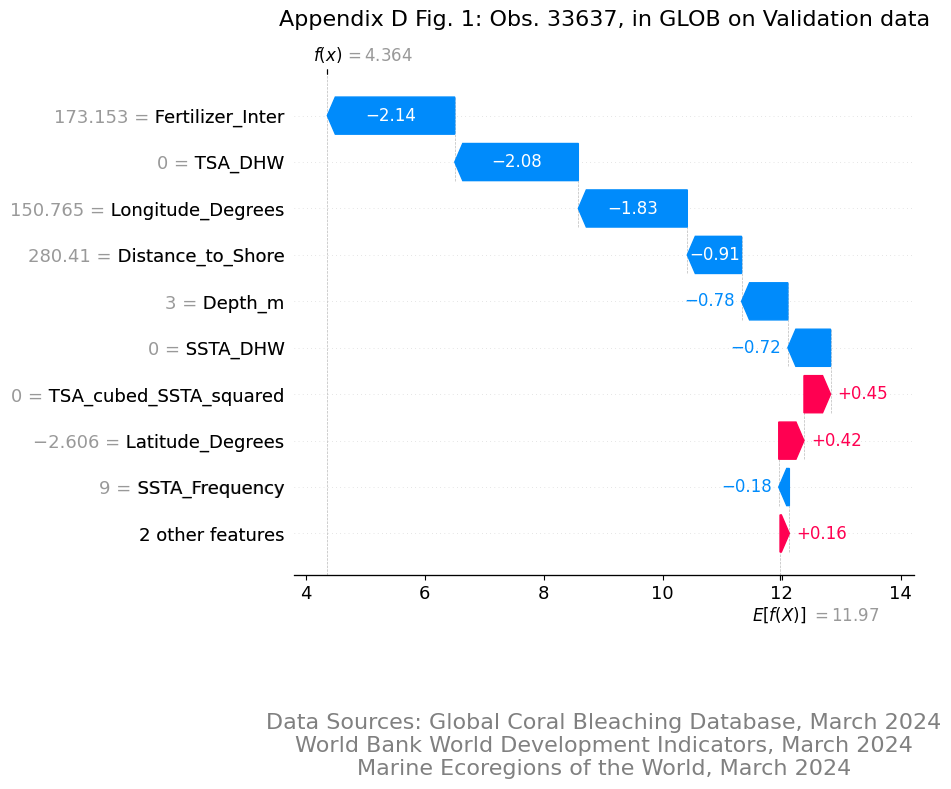

In [35]:
bad_investigate_record = bad_investigate_data.index.get_loc(int(Bad_Record_Var))

# Waterfall on a prediction
plt.figure(figsize=(8,6))
shap.plots.waterfall(bad_shap_values[bad_investigate_record], max_display=10, show=False)
anno_data = "Data Sources: Global Coral Bleaching Database, March 2024\nWorld Bank World Development Indicators, March 2024\nMarine Ecoregions of the World, March 2024"
#anno_fig = "Figure #"
plt.annotate(anno_data, (0.5, -0.4), xycoords='axes fraction', fontsize=16, color='gray', ha='center')
#plt.annotate(anno_fig, (1, -0.45), xycoords='axes fraction', fontsize=16, color='gray')
plt.title(f"Appendix D Fig. 1: Obs. {Bad_Record_Var}, in {Bad_Region_Var} on {Bad_Split_Var} data", fontsize=16, y=1.08)
plt.show()

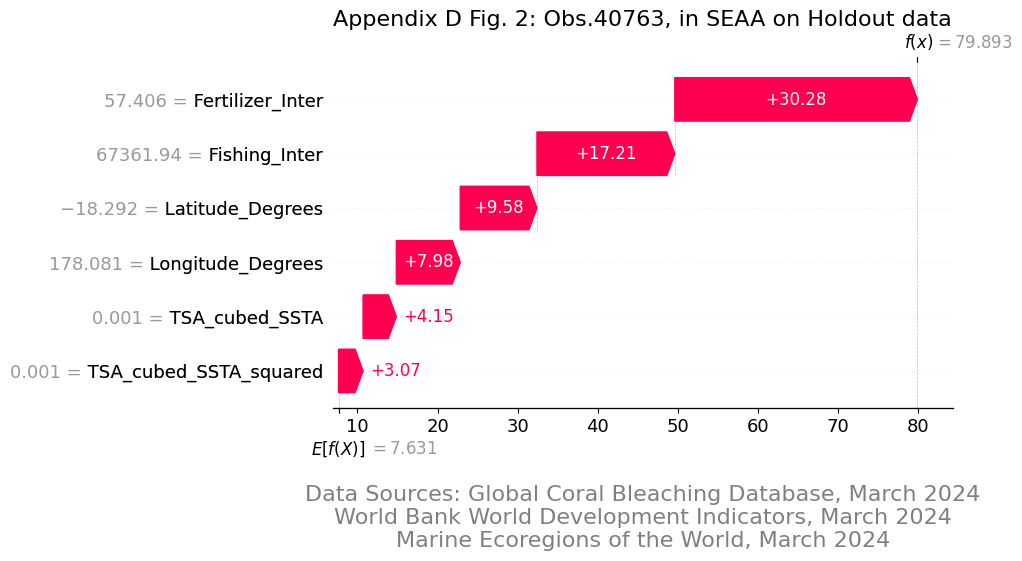

In [36]:
good_investigate_record = good_investigate_data.index.get_loc(int(Good_Record_Var))

# Waterfall on a prediction
plt.figure(figsize=(8,6))
shap.plots.waterfall(good_shap_values[good_investigate_record], max_display=10, show=False)
anno_data = "Data Sources: Global Coral Bleaching Database, March 2024\nWorld Bank World Development Indicators, March 2024\nMarine Ecoregions of the World, March 2024"
#anno_fig = "Figure #"
plt.annotate(anno_data, (0.5, -0.4), xycoords='axes fraction', fontsize=16, color='gray', ha='center')
#plt.annotate(anno_fig, (1, -0.45), xycoords='axes fraction', fontsize=16, color='gray')
plt.title(f"Appendix D Fig. 2: Obs.{Good_Record_Var}, in {Good_Region_Var} on {Good_Split_Var} data", fontsize=16, y=1.08)
plt.show()

### Appendix E: Data Dictionary

**Derived Features:**
|---|
|**Name**|**Description**|
|Fishing_Inter|Fishing Interactions ... WDI's EN.FSH.THRD.NO * ER.FSH.CAPT.MT|
|Fertilizer_Inter|Fertilizer Interactions ... WDI's AG.LND.AGRI.K2 / 'AG.CON.FERT.ZS'|
|Fert_and_Turbidity_Interaction|Fertilizer_Inter * Turbidity|
|Dist_to_Shore_and_Turbidity_Interaction|Dist_to_Shore * Turbidity|
|TSA_cubed_SSTA_squared|TSA^3 * SSTA^2|
|TSA_cubed_SSTA|TSA^3 * SSTA|
|Percent_Bleached_Value|Normalized calculation of Reefcheck and Donner measurement methods, using Percent_Bleached, S1, S2, S3, S4, and Severity_Code|

**Global Coral Bleaching Database:**
|---|
|Latitude_Degrees|Latitude coordinates in decimal degrees.|
|Longitude_Degrees| Longitude coordinates in decimal degrees.|
|Realm_Name|Identification of realm as defined by the Marine Ecoregions of the World (MEOW).|
|Ecoregion_Name|Identification of the Ecoregions as defined by Veron et al.|
|Country_Name|The country where sampling took place.|
|Distance_to_Shore| The distance (m) of the sampling site from the nearest land.|
|Turbidity| kd490 with a 100-km buffer.|
|Cyclone_Frequency| Number of cyclone events from 1964 to 2014.|
|Depth| Depth (m) of the sampling site.|
|Substrate_Type|Substrate type ID field from Substrate_LUT.|
|S1, S2, S3, S4|Point data from different segments of transects.|
|S1, S2, S3, S4|Percent bleaching from different segments of transects.|
|Severity_Code| Coded range of bleaching severity from Donner et al.|
|Percent_Bleached|Percent of coral bleaching.|
|ClimSST|CoRTAD. Climatological Sea-Surface Temperature (SST) based on weekly SSTs for the study time frame, created using a harmonics approach.|
|Windspeed| CoRTAD. Meters per hour.|
|SSTA|CoRTAD. Sea-Surface Temperature Anomaly, weekly SST minus weekly climatological SST.|
|SSTA_Frequency|CoRTAD. Sea Surface Temperature Anomaly Frequency, the number of times over the previous 52 weeks that SSTA ≥ 1 degree Celsius.|
|SSTA_DHW|CoRTAD. Sea Surface Temperature Degree Heating Weeks, the sum of the previous 12 weeks when SSTA ≥ 1 degree Celsius.|
|TSA|CoRTAD. Thermal Stress Anomaly, weekly SSTs minus the maximum of weekly climatological SSTs in degrees Celsius.|
|TSA_Frequency| CoRTAD. The number of times over the previous 52 weeks that TSA ≥ 1 degree Celsius.|
|TSA_DHW|CoRTAD. Thermal Stress Anomaly Degree Heating Weeks, the sum of the previous 12 weeks when TSA ≥ 1 degree Celsius.|

**Marine Ecoregions of the World:**
|---|
|**Name**|**Description**|
|ECOREGION|Marine Ecoregions of the World|
|PROVINCE|Marine Provinces|
|REALM|Marine Realms|
|geometry|Shape data required to draw polygons on maps|


**World Bank World Development Indicators:**
|---|
|**Code**|**Description**|
|AG.CON.FERT.PT.ZS|Fertilizer consumption (% of fertilizer production)|
|AG.CON.FERT.ZS|Fertilizer consumption (kilograms per hectare of arable land)|
|AG.LND.AGRI.K2|Agricultural land (sq. km)|
|AG.LND.AGRI.ZS|Agricultural land (% of land area)|
|AG.LND.FRST.K2|Forest area (sq. km)|
|AG.LND.FRST.ZS|Forest area (% of land area)|
|AG.LND.IRIG.AG.ZS|Agricultural irrigated land (% of total agricultural land)|
|EN.FSH.THRD.NO|Fish species, threatened|
|EN.POP.DNST|Population density (people per sq. km of land area)|
|ER.FSH.AQUA.MT|Aquaculture production (metric tons)|
|ER.FSH.CAPT.MT|Capture fisheries production (metric tons)|
|ER.FSH.PROD.MT|Total fisheries production (metric tons)|
|ER.MRN.PTMR.ZS|Marine protected areas (% of territorial waters)|
|ER.PTD.TOTL.ZS|Terrestrial and marine protected areas (% of total territorial area)|
|NV.AGR.TOTL.CD|Agriculture, forestry, and fishing, value added (current US\$)|
|NV.AGR.TOTL.KD.ZG|Agriculture, forestry, and fishing, value added (annual % growth)|
|NV.AGR.TOTL.ZS|Agriculture, forestry, and fishing, value added (% of GDP)|
|NY.ADJ.DFOR.CD|Adjusted savings: net forest depletion (current US\$)|
|NY.ADJ.DFOR.GN.ZS|Adjusted savings: net forest depletion (% of GNI)|
|NY.GDP.FRST.RT.ZS|Forest rents (% of GDP)|


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a5ab9c4-f125-4a61-a0b4-af0fc5325c87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>